In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [ ]:
for i in range(1,33):
    edo = format(i, "02d")
    df = pd.read_csv(f'/home/jovyan/work/data/external/sigade/{edo}-concentrado_escuelas.csv', encoding='ISO-8859-1')
    df.columns= df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", "_")
    print(df.shape)
    df.head(3)
    for column in df.columns[df.dtypes=='object']:
        df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df.head(3)
    df['x'] = df['ubicaciã³n_de_la_escuela-localidad_al_oeste_del_meridiano_de_greenwich,_expresada_en_grados']
    df['y'] = df['ubicaciã³n_de_la_escuela-localidad_al_norte_del_ecuador,_expresada_en_grados']
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326" )
    gdf.plot()
    

In [81]:
sigade = pd.DataFrame()
for i in range(1,33):
    edo = format(i, "02d")
    df = pd.read_csv(f'/home/jovyan/work/data/external/sigade/{edo}-concentrado_escuelas.csv', encoding='ISO-8859-1')
    df.columns= df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", "_")
    for column in df.columns[df.dtypes=='object']:
        df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    sigade = sigade.append(df)

In [89]:
errorsN = sigade[sigade['y']>32.718333]
errorsS = sigade[sigade['y']<11.968611]
errorsW = sigade[sigade['x']<-122.170278]
errorsE = sigade[sigade['x']>-84.641667]

In [90]:
errors = errorsN.append(errorsS.append(errorsW.append(errorsE)))
len(errors)

8416

<AxesSubplot:>

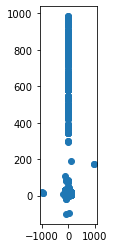

In [84]:
sigade['x'] = sigade['ubicaciã³n_de_la_escuela-localidad_al_oeste_del_meridiano_de_greenwich,_expresada_en_grados']
sigade['y'] = sigade['ubicaciã³n_de_la_escuela-localidad_al_norte_del_ecuador,_expresada_en_grados']
gdf = gpd.GeoDataFrame(sigade, geometry=gpd.points_from_xy(sigade.x, sigade.y), crs="EPSG:4326" )
gdf.plot()